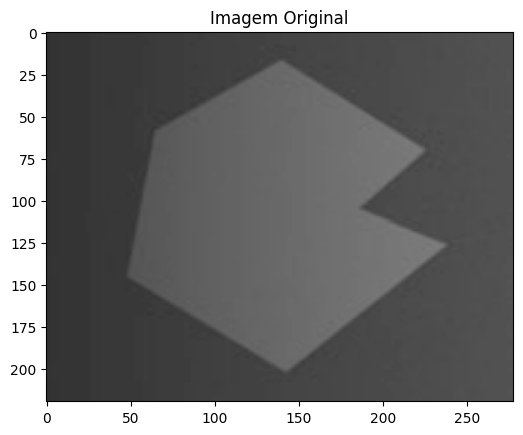

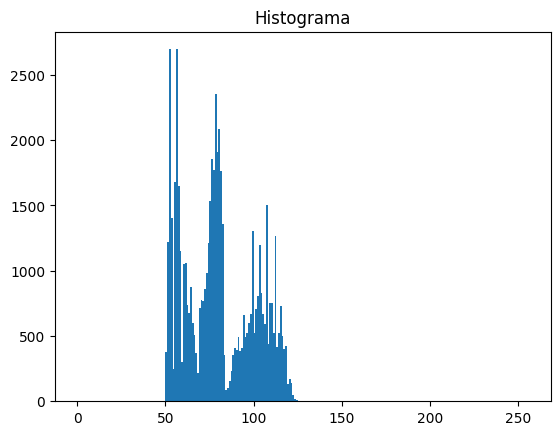

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/image.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()
plt.title("Histograma")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()


84.0


Text(0.5, 1.0, 'Segmentação (A partir de um limiar global)')

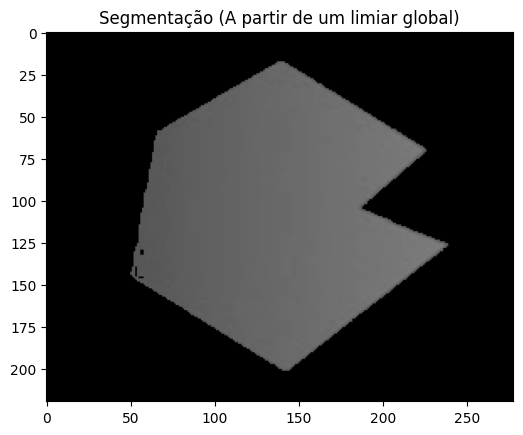

In [7]:
T = 84
ret, th = cv.threshold(img, T, 255, cv.THRESH_TOZERO)
plt.imshow(th, 'gray', vmin=0, vmax=255)
plt.title("Segmentação (A partir de um limiar global)")


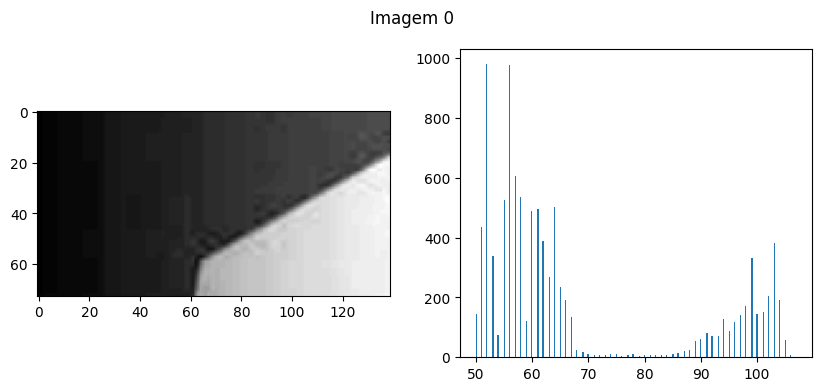

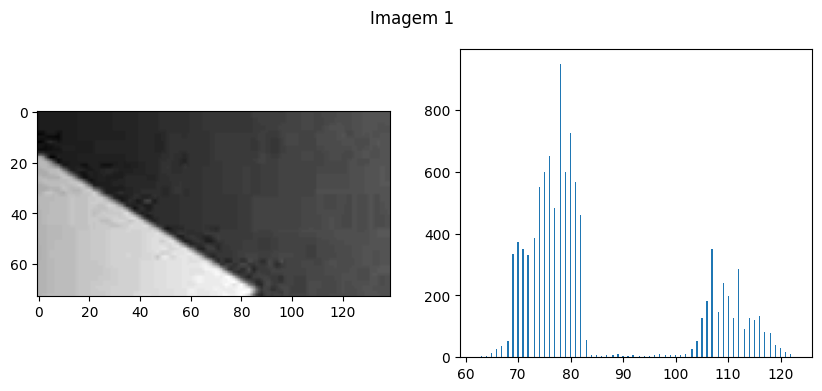

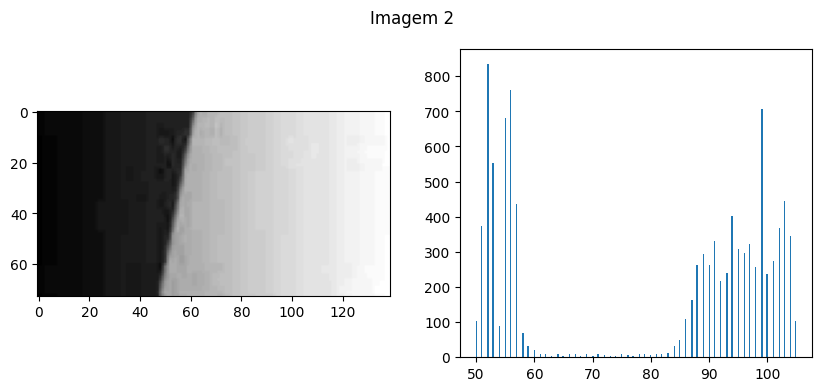

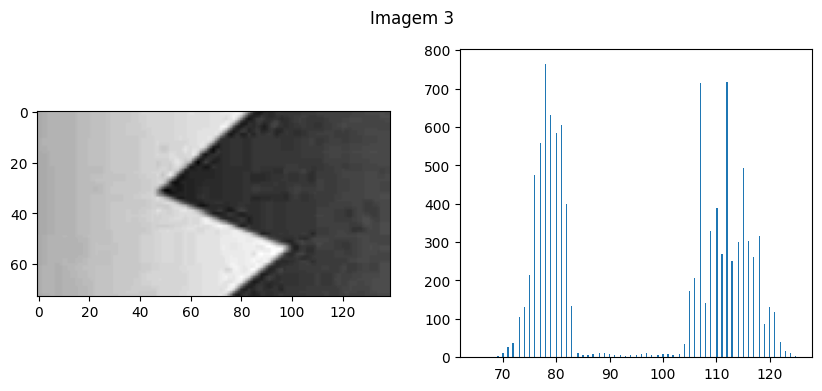

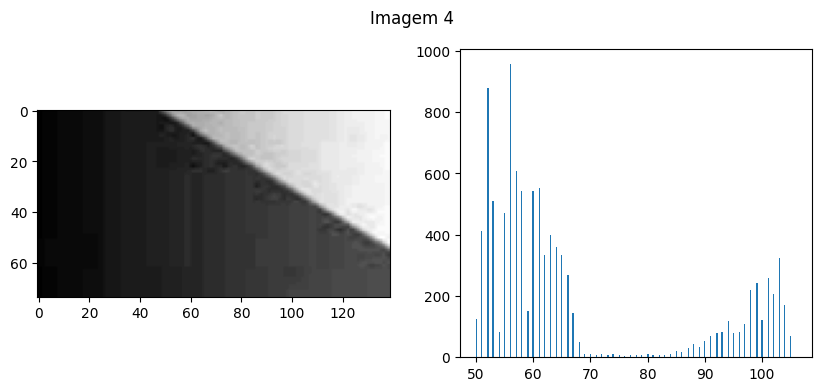

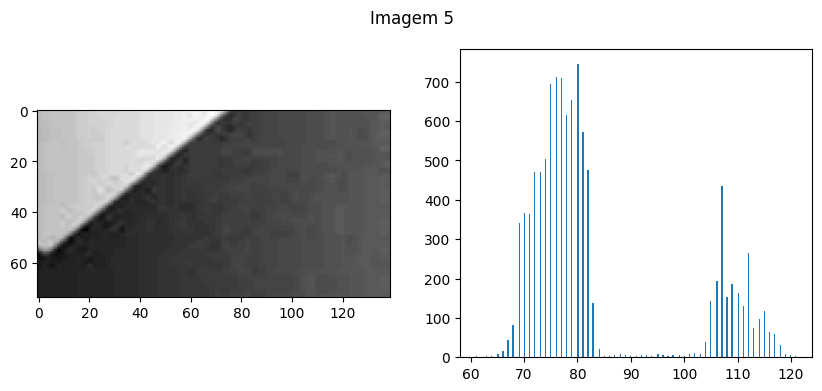

In [22]:
img2 = img
arr = []
images = []

height, width = img.shape
W_size = 2
H_size = 3

for i_h in range(H_size):
    arr_x = []
    
    for i_w in range(W_size):

        x = width / W_size * i_w
        y = height / H_size * i_h
        h = height / H_size
        w = width / W_size

        img = img[int(y): int(y+h), int(x): int(x+w)]
        ret, th = cv.threshold(img, 0, 255, cv.THRESH_TOZERO+cv.THRESH_OTSU)
        images.append(img)
        arr_x.append(th)
        img = img2
        
    arr.append(arr_x)

for i in range(W_size*H_size):
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
    f.suptitle(f"Imagem {i}")
    ax1.imshow(images[i],'gray')
    ax2.hist(images[i].ravel(),256)
    plt.show()


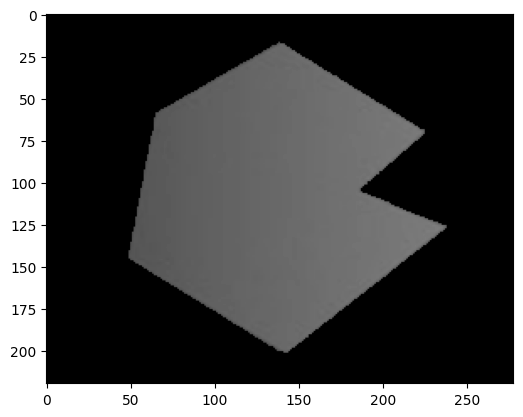

In [5]:
arr_y = []

for el in arr:
    horizontal = cv.hconcat(el)
    arr_y.append(horizontal)

img_joined = cv.vconcat(arr_y)
plt.imshow(img_joined, 'gray', vmin=0, vmax=255)
plt.show()